Text Classification: GRU vs LSTM

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3626 - loss: 2.6579
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5325 - loss: 1.7368
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6012 - loss: 1.5281
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6534 - loss: 1.3258
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6975 - loss: 1.1717
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7306 - loss: 1.0205
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7861 - loss: 0.8198
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8138 - loss: 0.7344
Epoch 9/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8496 - loss: 0.5966
Epoch 10/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8599 - loss: 0.5358
Epoch 11/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8838 - loss: 0.4617
Epoch 12/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 

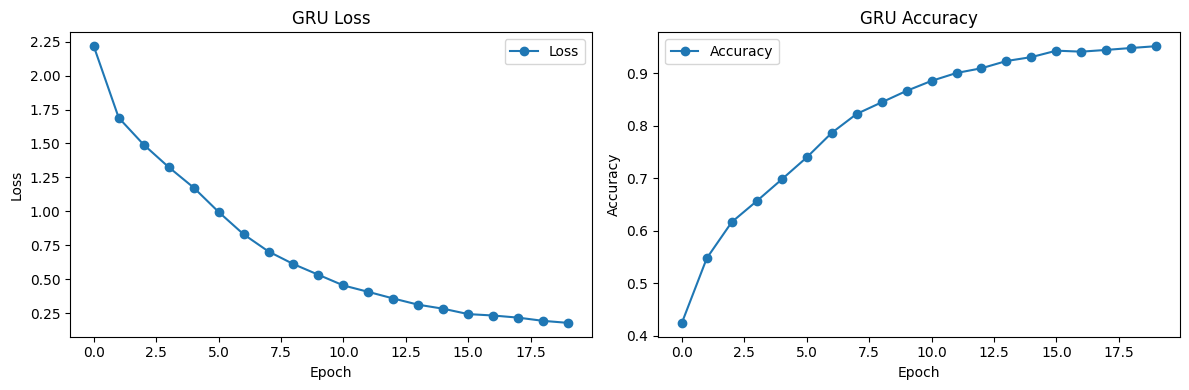

In [ ]:
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional
from keras.utils import to_categorical

vocab_size = 40000
max_words = 500

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size)

x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

embedding_dim = 128
model = Sequential(name="GRU_Model_Multiclass")
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(128, activation='tanh', return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

gru_history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    verbose=1
)

score = model.evaluate(x_test, y_test, verbose=0)
print("\nGRU - loss, accuracy ", score)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(gru_history.history['loss'], marker='o', label='Loss')
plt.title('GRU Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], marker='o', label='Accuracy')
plt.title('GRU Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3697 - loss: 2.6951
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4953 - loss: 1.9907
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5318 - loss: 1.7806
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5882 - loss: 1.5635
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6412 - loss: 1.3614
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6324 - loss: 1.3934
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7173 - loss: 1.0833
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7631 - loss: 0.9211
Epoch 9/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8075 - loss: 0.7415
Epoch 10/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8406 - loss: 0.6206
Epoch 11/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8668 - loss: 0.5277
Epoch 12/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 

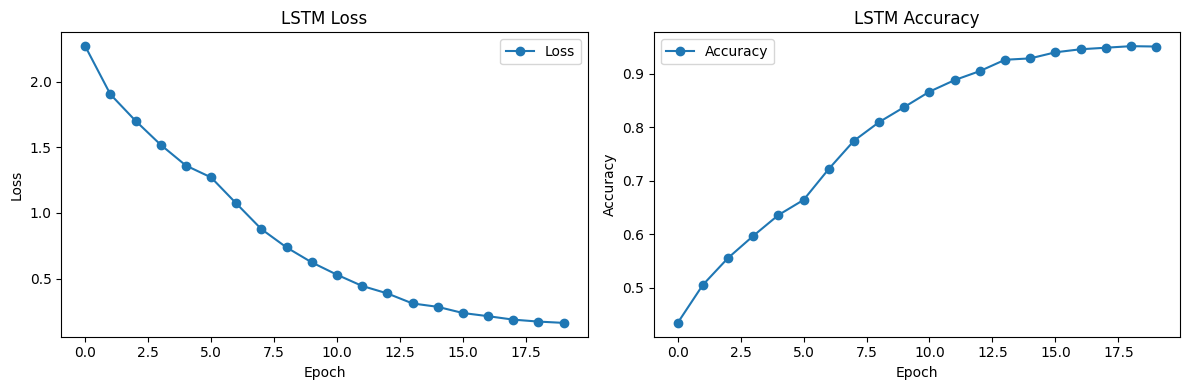

In [ ]:
vocab_size = 40000
max_words = 500
embedding_dim = 128

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size)
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

lstm_model = Sequential(name="LSTM_Text_Classification")
lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_words))
lstm_model.add(LSTM(128, activation='tanh', return_sequences=False))
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

lstm_history = lstm_model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
)

score = lstm_model.evaluate(x_test, y_test, verbose=0)
print("\nLSTM - loss, accuracy ", score)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], marker='o', label='Loss')
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], marker='o', label='Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()